<a href="https://colab.research.google.com/github/czhan244/MAT421/blob/main/Module_F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Chapter 20 Numerical Differentiation**

20.1 Numerical Differentiation Problem Statement

Numerical Grid - an even spaced set of points over the domain of a function, over some interval.

Space/Step size of Numerical Grid - distance between adjacent points on grid 

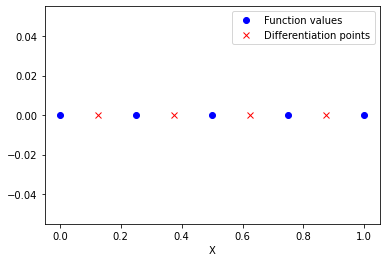

In [4]:
import numpy as np
import matplotlib.pyplot as plt

n = 5
x = np.linspace(0, 1, n)
dx = x[1] - x[0]
x_mid = x[:-1] + dx/2
plt.plot(x, np.zeros_like(x), 'bo', label='Function values')
plt.plot(x_mid, np.zeros_like(x_mid), 'rx', label='Differentiation points')
plt.xlabel('X')
plt.legend()
plt.show()


***

20.2 Finite Difference Approximating Derivatives

In finite difference approximations of the slope, we can use values of the function in the neighborhoood of the point to achieve the goal

Three Type: Forward difference, Backward difference, and Central Difference

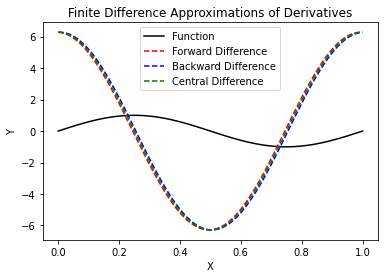

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return np.sin(2*np.pi*x)

n = 100
x = np.linspace(0, 1, n)
dx = x[1] - x[0]
dfdx_forward = (f(x + dx) - f(x))/dx
dfdx_backward = (f(x) - f(x - dx))/dx
dfdx_central = (f(x + dx) - f(x - dx))/(2*dx)
plt.plot(x, f(x), 'k-', label='Function')
plt.plot(x, dfdx_forward, 'r--', label='Forward Difference')
plt.plot(x, dfdx_backward, 'b--', label='Backward Difference')
plt.plot(x, dfdx_central, 'g--', label='Central Difference')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Finite Difference Approximations of Derivatives')
plt.legend()
plt.show()


***

20.3 Approximating of Higher Order Derivatives

It is also possible to use Taylor series to approximate higher order derivatives

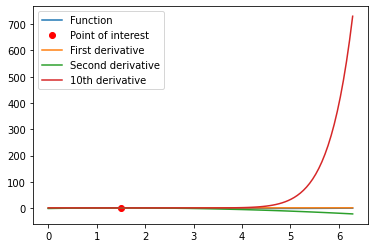

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return np.sin(x)
x0 = 1.5
h = 0.1
n = 10
df1 = (f(x0 + h) - f(x0 - h)) / (2 * h)    
df2 = (f(x0 + h) - 2*f(x0) + f(x0 - h)) / (h**2)    
dfn = (f(x0 + n*h) - f(x0 - n*h)) / ((2 * n * h)**n)    
x = np.linspace(0, 2*np.pi, 100)
y = f(x)
plt.plot(x, y, label='Function')
plt.plot(x0, f(x0), 'ro', label='Point of interest')
plt.plot(x, df1*(x - x0) + f(x0), label='First derivative')
plt.plot(x, df2*(x - x0)**2 + f(x0), label='Second derivative')
plt.plot(x, dfn*(x - x0)**n + f(x0), label='{}th derivative'.format(n))
plt.legend()
plt.show()


***

20.4 Numberical Differentiation with Noise

Sometimes f is given as a vector where f is the corresponding function value for independent data values in another vector x, which is gridded. Sometimes data can be contaminated with "noise", meaning its value is off by a small amount from what it would be if it were computed from a pure mathematical function

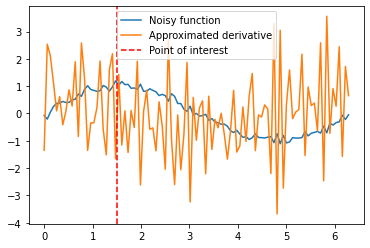

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return np.sin(x)
x0 = 1.5
h = 0.1
noise = np.random.normal(0, 0.1, size=100)    
y = f(np.linspace(0, 2*np.pi, 100)) + noise    
df = (y[1:] - y[:-1]) / h    
x = np.linspace(0, 2*np.pi, 99)
plt.plot(x, y[:-1], label='Noisy function')
plt.plot(x, df, label='Approximated derivative')
plt.axvline(x=x0, color='r', linestyle='--', label='Point of interest')
plt.legend()
plt.show()
